In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart (1).csv to heart (1).csv


In [ ]:
path = 'heart (1).csv'
df = pd.read_csv(path)
df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
X = df.drop("target",1)
Y = df["target"]

<ipython-input-4-db297d0c0a06>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop("target",1)


In [ ]:
corr=df.corr()
cor_target = abs(corr["target"])

In [ ]:
relevant_features = cor_target[cor_target>=0.35]
relevant_features

cp         0.433798
thalach    0.421741
exang      0.436757
oldpeak    0.430696
ca         0.391724
target     1.000000
Name: target, dtype: float64

In [ ]:
X_new = df[['cp','thalach','exang','oldpeak','slope','ca','thal']]
X_new

,cp,thalach,exang,oldpeak,slope,ca,thal
0,3,150,0,2.3,0,0,1
1,2,187,0,3.5,0,0,2
2,1,172,0,1.4,2,0,2
3,1,178,0,0.8,2,0,2
4,0,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...
298,0,123,1,0.2,1,0,3
299,3,132,0,1.2,1,0,3
300,0,141,0,3.4,1,2,3
301,0,115,1,1.2,1,1,3


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_new, Y, test_size=0.3)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (212, 7) (212,)
Test set: (91, 7) (91,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier



In [ ]:
k = 3
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn import metrics



In [ ]:
yhat = neigh.predict(X_test)



In [ ]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.839622641509434
Test set Accuracy:  0.7252747252747253


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(y_test,yhat)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

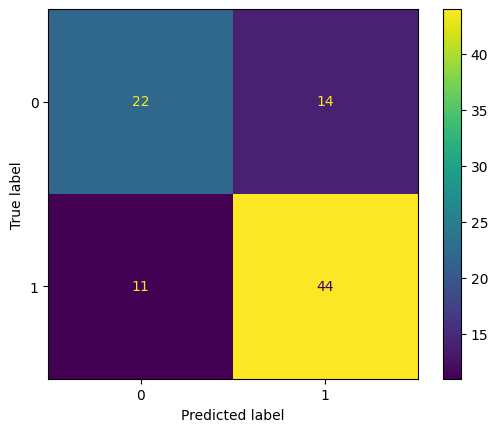

In [ ]:
disp.plot()

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_test,yhat, average = 'weighted')

0.7229492323759349

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
precision_score(y_test,yhat, average = 'weighted')

0.7222432739674118

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_score(y_train, yhat, average='weighted')

ValueError: ignored